In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

Library Selection and Document read

In [122]:
df=pd.read_csv('/content/sample_data/Melbourne_housing_FULL.csv')
df_copy=df.copy()

Some Information About Variables in Dataset

In [123]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [124]:
print(df_copy.size)
print(df_copy.shape)
print(df_copy.ndim)

731997
(34857, 21)
2


In [125]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


Converting Objects to Categorical Variables

In [126]:
print(df_copy.select_dtypes(['object']).columns)
obj_to_cat=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname']


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [127]:
for colname in obj_to_cat:
    df_copy[colname]=df_copy[colname].astype('category')

Duplicated Variable Detection and Dropping

In [128]:
df_copy.duplicated().sum()

1

In [129]:
df_copy.loc[df_copy.duplicated(keep=False),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [130]:
df_copy.drop_duplicates(inplace=True)

Unique Variable Numbers

In [131]:
df_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

Seperating Categorical and Numerical Values

In [132]:
num_cols=["Rooms","Distance","Price","Postcode","Bedroom2","Bathroom","Car","Landsize","BuildingArea" ,"YearBuilt","Lattitude","Longtitude",
            "Propertycount"]
cat_cols=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea','Regionname']

Outlier Detection and Handling

In [133]:
def oth(df,col_name, low_quantile=0.25,up_quantile=0.75):
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    print(col_name,low_limit,up_limit)
    return low_limit,up_limit

In [134]:
def detection(dataframe,col_name):
    low_limit,up_limit=oth(dataframe,col_name)
    if dataframe[(dataframe[col_name]>up_limit)| (dataframe[col_name]<low_limit)].any(axis=None):
                                                  return True
    else:
                                                  return False



In [135]:
for col in num_cols:
    print(col,detection(df_copy,col))


Rooms -1.0 7.0
Rooms True
Distance -4.999999999999998 25.4
Distance True
Price -355000.0 2285000.0
Price True
Postcode 2893.5 3313.5
Postcode True
Bedroom2 -1.0 7.0
Bedroom2 True
Bathroom -0.5 3.5
Bathroom True
Car -0.5 3.5
Car True
Landsize -445.0 1339.0
Landsize True
BuildingArea -27.0 317.0
BuildingArea True
YearBuilt 1850.0 2090.0
YearBuilt True
Lattitude -38.02623625 -37.59080625
Lattitude True
Longtitude 144.72590000000002 145.27949999999998
Longtitude True
Propertycount -4655.5 19452.5
Propertycount True


<ipython-input-134-0fe80e1f4098>:3: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  if dataframe[(dataframe[col_name]>up_limit)| (dataframe[col_name]<low_limit)].any(axis=None):
<ipython-input-134-0fe80e1f4098>:3: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  if dataframe[(dataframe[col_name]>up_limit)| (dataframe[col_name]<low_limit)].any(axis=None):
<ipython-input-134-0fe80e1f4098>:3: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is

In [136]:
def replace(dataframe,variables):
    low_limit, up_limit= oth(dataframe,variables)
    dataframe.loc[(dataframe[variables]<low_limit),variables]=low_limit
    dataframe.loc[(dataframe[variables]>up_limit),variables]=up_limit



In [137]:
for col in num_cols:
    print(col,replace(df_copy,col))


Rooms -1.0 7.0
Rooms None
Distance -4.999999999999998 25.4
Distance None
Price -355000.0 2285000.0
Price None
Postcode 2893.5 3313.5
Postcode None
Bedroom2 -1.0 7.0
Bedroom2 None
Bathroom -0.5 3.5
Bathroom None
Car -0.5 3.5
Car None
Landsize -445.0 1339.0
Landsize None
BuildingArea -27.0 317.0
BuildingArea None
YearBuilt 1850.0 2090.0
YearBuilt None
Lattitude -38.02623625 -37.59080625
Lattitude None
Longtitude 144.72590000000002 145.27949999999998
Longtitude None
Propertycount -4655.5 19452.5
Propertycount None


Text(0.5, 1.0, 'BuildingArea Box Plot wo Outlier')

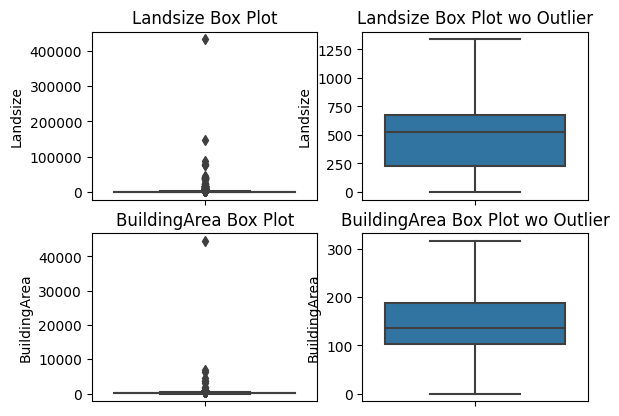

In [138]:
plt.subplot(2,2,1)
sns.boxplot(y="Landsize",data=df)
plt.title("Landsize Box Plot");

plt.subplot(2,2,2)
sns.boxplot(y="Landsize",data=df_copy)
plt.title("Landsize Box Plot wo Outlier");

plt.subplot(2,2,3)
sns.boxplot(y="BuildingArea",data=df)
plt.title("BuildingArea Box Plot")

plt.subplot(2,2,4)
sns.boxplot(y="BuildingArea",data=df_copy)
plt.title("BuildingArea Box Plot wo Outlier")

Missing Values Detection and Handling

In [139]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [140]:
df_copy.isnull().mean()*100


Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.829814
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.574134
Bathroom         23.599954
Car              25.040165
Landsize         33.882258
BuildingArea     60.577806
YearBuilt        55.387882
CouncilArea       0.008607
Lattitude        22.882717
Longtitude       22.882717
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [141]:
Dropping_Value=["Price"]
df_copy.dropna(subset=Dropping_Value,inplace=True)

In [142]:
nums_new=df_copy[num_cols]

In [143]:
nums_new.isnull().sum()

Rooms                0
Distance             1
Price                0
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
Lattitude         6254
Longtitude        6254
Propertycount        3
dtype: int64

In [144]:
nums_new=nums_new.apply(lambda x: x.fillna(x.mean()),axis=0)
nums_new.head()

,Rooms,Distance,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,2.5,1480000.0,3067.0,2.0,1.0,1.0,202.0,146.36963,1966.667411,-37.7996,144.9984,4019.0
2,2,2.5,1035000.0,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,144.9934,4019.0
4,3,2.5,1465000.0,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,144.9944,4019.0
5,3,2.5,850000.0,3067.0,3.0,2.0,1.0,94.0,146.36963,1966.667411,-37.7969,144.9969,4019.0
6,4,2.5,1600000.0,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,144.9941,4019.0


In [145]:
cat_cols_new=df_copy.select_dtypes("category")

In [146]:
cat_cols_new=cat_cols_new.apply(lambda x:x.fillna(x.mode()))

In [147]:
df_new_copy=pd.concat([cat_cols_new,nums_new],axis=1)

Data Visualization(Price variable)

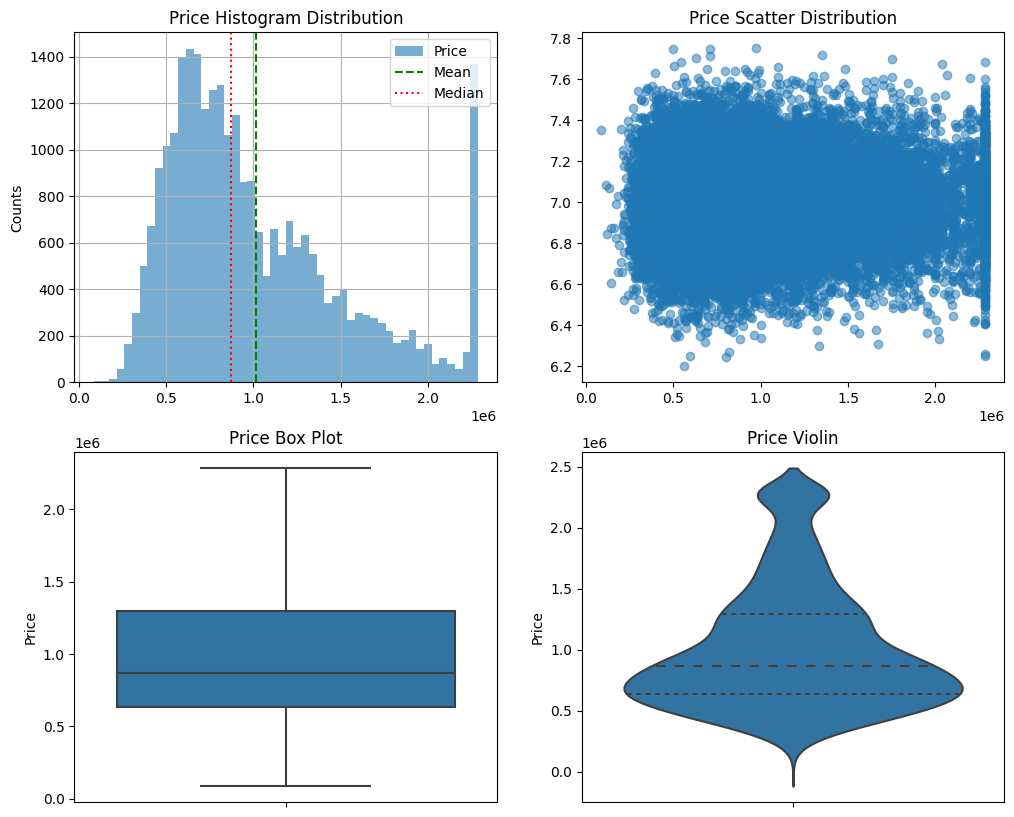

In [148]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
df_new_copy["Price"].hist(bins=50,label="Price",alpha=0.6)
plt.axvline(np.mean(df_new_copy["Price"]),ls="--",c="g",label="Mean")
plt.axvline(np.median(df_new_copy["Price"]),ls=":",c="r",label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");
plt.legend()

plt.subplot(2,2,2)
plt.scatter(df_new_copy["Price"],np.random.normal(7,0.2,size=df_copy.shape[0]),alpha=0.5)
plt.title("Price Scatter Distribution");

plt.subplot(2,2,3)
sns.boxplot(y="Price",data=df_new_copy)
plt.title("Price Box Plot");

plt.subplot(2,2,4)
sns.violinplot(y="Price",data=df_new_copy,inner="quartile",bw=0.2)
plt.title("Price Violin");

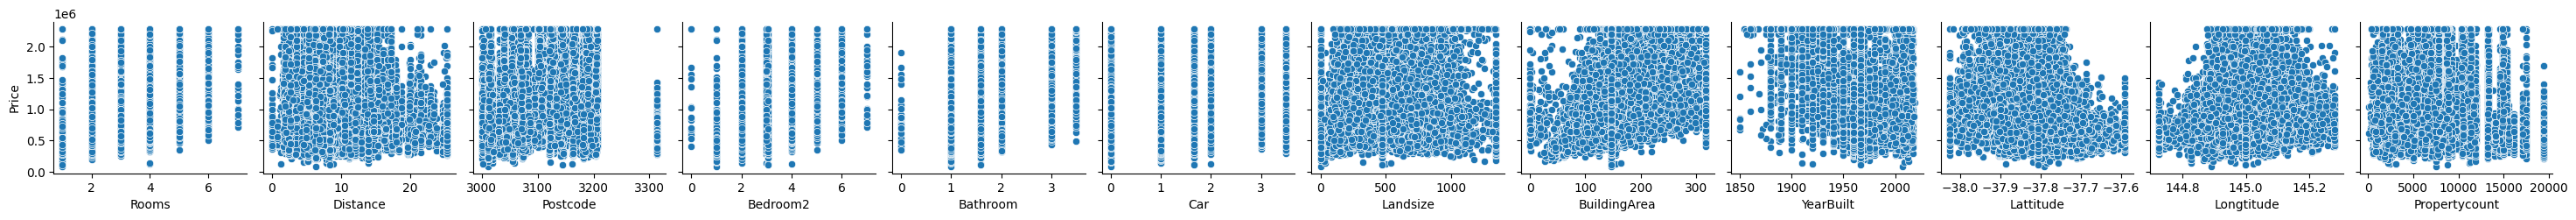

In [149]:
sns.pairplot(data=df_new_copy,
             y_vars=["Price"],
             x_vars=["Rooms","Distance","Postcode","Bedroom2","Bathroom","Car","Landsize","BuildingArea" ,"YearBuilt","Lattitude","Longtitude",
            "Propertycount"])

Heatmap

<ipython-input-150-99c832d73660>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_new_copy.corr()


<Axes: >

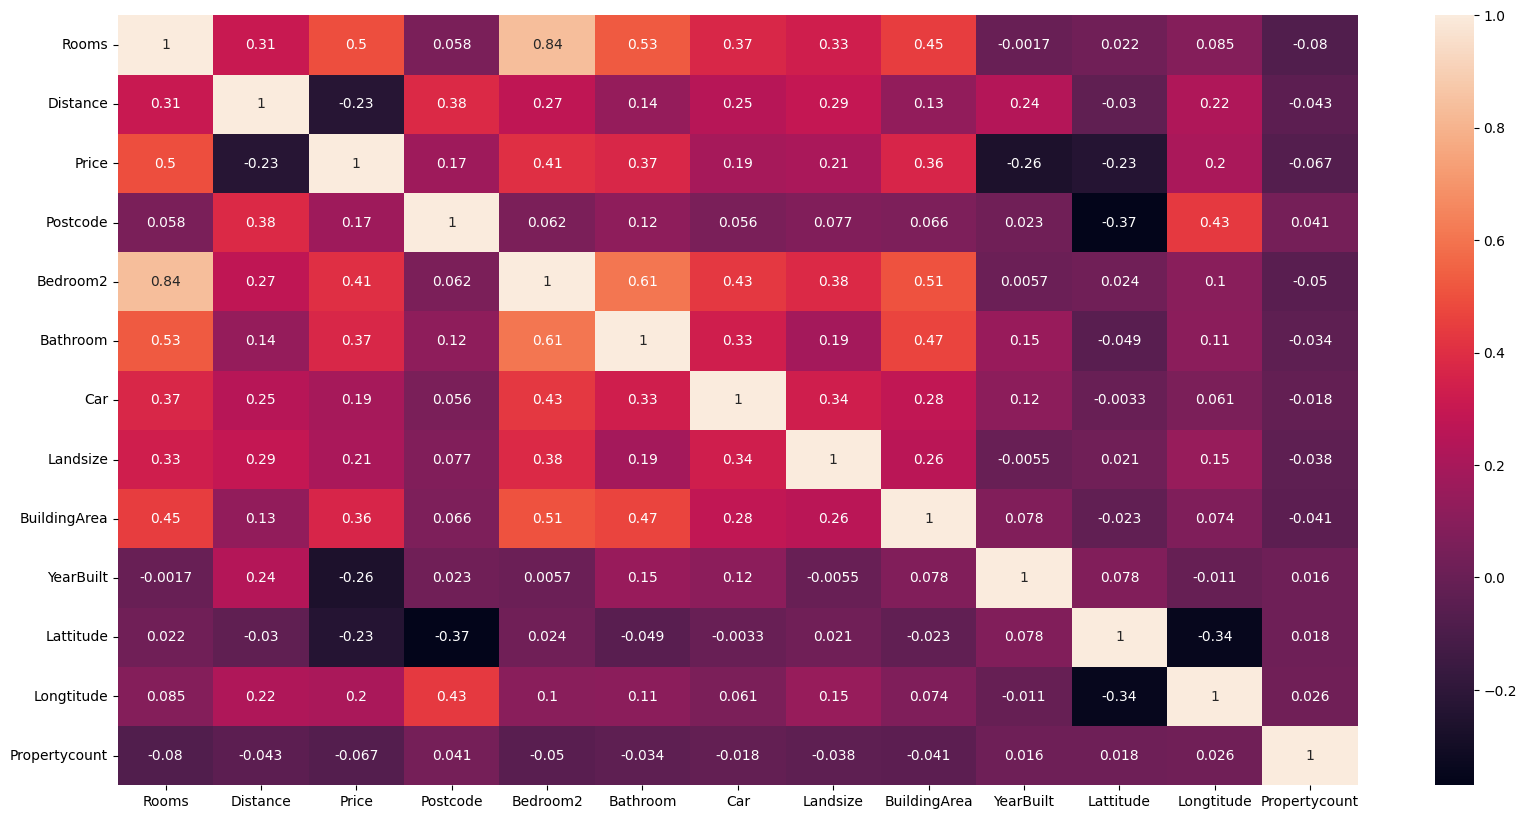

In [150]:
corr=df_new_copy.corr()
plt.figure(figsize=(20,10))

sns.heatmap(corr,annot=True)

One Hot Off Encoding

In [151]:
df_new_copy.drop("Address",inplace=True,axis=1)
df_new_copy.head()

,Suburb,Type,Method,SellerG,Date,CouncilArea,Regionname,Rooms,Distance,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,Abbotsford,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan,2,2.5,1480000.0,3067.0,2.0,1.0,1.0,202.0,146.36963,1966.667411,-37.7996,144.9984,4019.0
2,Abbotsford,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan,2,2.5,1035000.0,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,144.9934,4019.0
4,Abbotsford,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan,3,2.5,1465000.0,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,144.9944,4019.0
5,Abbotsford,h,PI,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan,3,2.5,850000.0,3067.0,3.0,2.0,1.0,94.0,146.36963,1966.667411,-37.7969,144.9969,4019.0
6,Abbotsford,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan,4,2.5,1600000.0,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,144.9941,4019.0


In [152]:
cat_cols.remove("Address")

In [153]:
one_hot = pd.get_dummies(df_new_copy[cat_cols],drop_first=True)
one_hot.head()

,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [154]:
df_new_copy=pd.concat([one_hot,df_new_copy[num_cols]],axis=1)

Scaling and Model Training

In [155]:
X=df_new_copy.drop("Price",axis=1)
y=df_new_copy["Price"]

In [156]:
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [158]:
models_dict = {
  'Lasso': {
    'model': Lasso()
  },
  'LinearRegression': {
    'model': LinearRegression()
  },
  'Ridge': {
    'model': Ridge()
  },
  'ElasticNet': {
    'model': ElasticNet()
  },
  'KNeighborsRegressor': {
    'model': KNeighborsRegressor()
  },
  'RandomForestRegressor': {
    'model': RandomForestRegressor()
  },
  'GradientBoostingRegressor': {
    'model': GradientBoostingRegressor()
  },
  'AdaBoostRegressor': {
    'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
  }
}

In [159]:
for key, item in models_dict.items():
  model = item.get('model')

  model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.314e+14, tolerance: 5.645e+11
  model = cd_fast.enet_coordinate_descent(


In [160]:
def regression_performance_evaluation(key,preds):
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)

  print("*** Model: ", key , ' ***')
  print("R2 Score:", r_squared)
  print('Mean Absolute Error:', mae)
  print('Mean Squared Error:', mse)
  print('Root Mean Squared Error:', rmse)

  print()


In [161]:
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = model.predict(X_test)

  item.update({"y_preds": y_preds})


In [162]:
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = item.get('y_preds')

  regression_performance_evaluation(key,y_preds)


*** Model:  Lasso  ***
R2 Score: 0.7781170479035453
Mean Absolute Error: 179581.65220597573
Mean Squared Error: 56908357680.0746
Root Mean Squared Error: 238554.72680304325

*** Model:  LinearRegression  ***
R2 Score: -5.621111944420971e+26
Mean Absolute Error: 6.804986226179133e+17
Mean Squared Error: 1.441698183976702e+38
Root Mean Squared Error: 1.2007073681695728e+19

*** Model:  Ridge  ***
R2 Score: 0.7780627285029031
Mean Absolute Error: 179560.13960691524
Mean Squared Error: 56922289475.42663
Root Mean Squared Error: 238583.92543385364

*** Model:  ElasticNet  ***
R2 Score: 0.7341190420382027
Mean Absolute Error: 194573.2393534293
Mean Squared Error: 68192930160.012085
Root Mean Squared Error: 261137.76088496295

*** Model:  KNeighborsRegressor  ***
R2 Score: 0.4506623875867778
Mean Absolute Error: 272769.6465688073
Mean Squared Error: 140893660549.18896
Root Mean Squared Error: 375358.043139066

*** Model:  RandomForestRegressor  ***
R2 Score: 0.8390961564429202
Mean Absolute E

Our most Succesful Model appeared as RandomForestRegressor